In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

In [156]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Linear regression - One variable

In [157]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

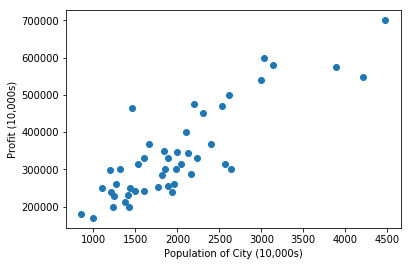

In [177]:
plt.scatter(X[:,1], y)
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit (10,000s)');

### Gradient Descent

In [159]:
def cost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1.0/(2*m)*np.sum(np.square(h-y))
    return(J)

In [160]:
cost(X,y)

32.072733877455676

In [161]:
def gradient_descent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters, 2))
    for iter in range(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))
        theta_history[iter, :] = theta.reshape((2, ))
        J_history[iter] = cost(X, y, theta)
    return(theta, J_history, theta_history)

theta: [-3.63029144  1.16636235]


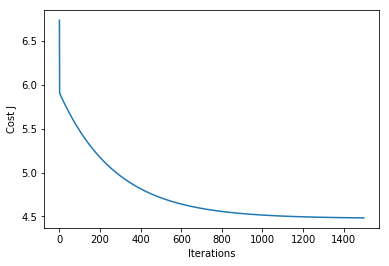

In [162]:
theta , Cost_J, theta_history = gradient_descent(X, y)
print('theta: '+ str(theta.ravel()))

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

Text(0,0.5,'Profit ($10,000s)')

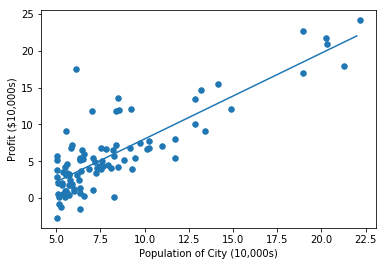

In [163]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

plt.scatter(X[:,1], y, s=30)
plt.plot(xx,yy, label="Gradient Descent")

plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000s)')

In [164]:
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


## Linear Regression - Multiple Variables

In [165]:
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = np.c_[ data[:, 0:2] ]
y = np.c_[ data[:, 2] ]
m = len(y)

In [166]:
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    
    for i in np.arange(X.shape[1]):
        mu[0,i] = X[:, i].mean()
        X_norm[:, i] -= mu[0, i]
        sigma[0, i] = X[:, i].std()
        X_norm[:, i] /= sigma[0, i]
    return (X_norm, mu, sigma)

In [167]:
X, mu, sigma = featureNormalize(X)
X = np.c_[ np.ones((m, 1)), X ]
alpha = .05
num_iters = 500

In [168]:
def cost_multi(X, y, theta):
    m = len(y)
    J = 0
    J = 1.0/(2*m) * (X.dot(theta) - y).T.dot(X.dot(theta) - y)
    return J

def gradient_descent_multi(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for i in np.arange(num_iters):
        theta -= (alpha / m) * X.T.dot(X.dot(theta) - y)
        J_history[i] = cost_multi(X, y, theta)
    return (theta, J_history)

In [169]:
theta = np.zeros((3, 1))
(theta, J_history) = gradient_descent_multi(X, y, theta, alpha, num_iters)

Text(0,0.5,'Cost J')

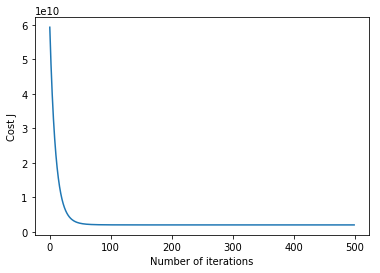

In [170]:
plt.plot(np.arange(0, len(J_history)), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

In [171]:
print(theta)

[[340412.65957199]
 [109446.94024209]
 [ -6577.49862661]]


In [172]:
price = np.c_[1, (2000 - mu[0, 0]) / sigma[0, 0], (4 - mu[0, 1]) / sigma[0, 1]].dot(theta)
print(price[0, 0]) #Predicted price (2000 ft^2, 4 br)

333068.12560618896


## Normal Equation

In [173]:
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = np.c_[ data[:, 0:2] ]
y = np.c_[ data[:, 2] ]
m = len(y)
X = np.c_[ np.ones((m, 1)), X ]

In [174]:
def normal(X, y):
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [175]:
theta = normal(X, y)
print(theta);

[[89597.90954361]
 [  139.21067402]
 [-8738.01911255]]


In [176]:
price = np.c_[1, 2000, 4].dot(theta);
print(price[0, 0]) #same prediction

333067.1811285973
